# Spam Mail Prediction

## Importing the dependencies

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Data Collection and Analysis

In [2]:
# loading the data from a csv file to a pandas dataframe
raw_mail_data = pd.read_csv('mail_data.csv')

In [3]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
raw_mail_data.shape

(5572, 2)

In [5]:
raw_mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
raw_mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [12]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Label Encoding

In [13]:
mail_data.replace({'Category': {'ham': 0, 'spam':1}}, inplace=True)

In [14]:
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
mail_data['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

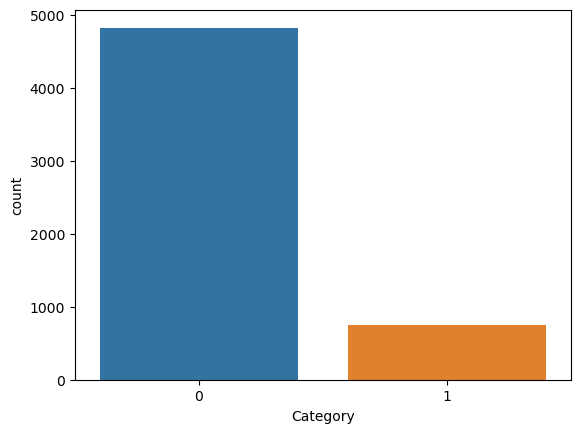

In [33]:
sns.countplot(x='Category', data=mail_data)
plt.show()

In [40]:
(mail_data['Category'] == 1).sum() / mail_data.shape[0]

0.13406317300789664

13% of the mails in the dataset are spam. Therefore, there is some class imbalance in this data.

## Separating feature and label

In [16]:
X = mail_data['Message']
y = mail_data['Category']

## Splitting the dataset into training set and test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

## Feature Extraction

In [18]:
X[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [26]:
# transform the text data to feature vectors that can be used as input to the logistic regression model
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

## Training the Logistic Regression Model

In [27]:
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

## Model Evaluation

### Evaluation on Training Set

In [29]:
y_pred_train = model.predict(X_train_features)
print('Accuracy score = {:.2f}%'.format(accuracy_score(y_train, y_pred_train) * 100))
print(confusion_matrix(y_train, y_pred_train))

Accuracy score = 97.03%
[[3617    2]
 [ 122  438]]


### Evaluation on Test Set

In [30]:
y_pred_test = model.predict(X_test_features)
print('Accuracy score = {:.2f} %'.format(accuracy_score(y_test, y_pred_test) * 100))
print(confusion_matrix(y_test, y_pred_test))

Accuracy score = 95.84 %
[[1204    2]
 [  56  131]]
